# Regression Models:
        Team: Jacob Romeo, David Serfaty, and Aliya Trussell



# Summary:

* For the assignment we took the diabetes dataset that can be found using the link below. The dataset references age, sex, bmi (body mass index) and bp (blood pressure). To facilitate polynomial regression, selecting bmi as the independent variable and the target as the dependent variable.

* A **linear regression** model was initially used. This model is similar to what you learn in basic algebra with the function y = mx+b where x is your independent variable and y is the dependent/predicted value.

* A **polynomial regression** model was used after to fit the data better. This regression’s function can be shown as y = A0 + A1x + A2x^2...Anx^n. An example is shown on how the degrees will fit the data dependent better, or cause it to overfit based on how much data you have.

* There are examples of **3 kinds of regularizations** after the Polynomial example. These are different ways of improving the model, they are used with the polynomial regression.

* **One thing I learned** from this assignnment is that polynomial regression is still only a model that has a one-to-one relationship. Predicting something like diabetes has multiple independent variables that all account for why a person can have diabetes. Polynomial and linear regression can only look at one of those variables at a time. Hence why a model like neural networks or genetic algorithms.


### Dataset: https://bit.ly/3trr7aY


In [2]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Importing and analyzing the dataset (including the avg, max, and min values)

In [5]:
diabetes = load_diabetes()
features, target = load_diabetes(return_X_y=True, as_frame=True)
table = pd.DataFrame(features, columns=list(diabetes.feature_names))
table["target"] = diabetes.target
print(table.shape)
table.describe()

(442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [35]:
# Coloumn being used as a dependent variable for regression models, aka bmi
column = 0

# Split the data 80:20
train_data, test_data, train_label, test_label = train_test_split(diabetes.data[:, np.newaxis, 2],
                                                  diabetes.target,
                                                  train_size = 0.8)

## Size of the data

In [36]:
print(f"Train: {train_data.shape}, Label: {train_label.shape}")
print(f"Test: {test_data.shape}, Label: {test_label.shape}")

Train: (353, 1), Label: (353,)
Test: (89, 1), Label: (89,)


## Scatter Matrix 

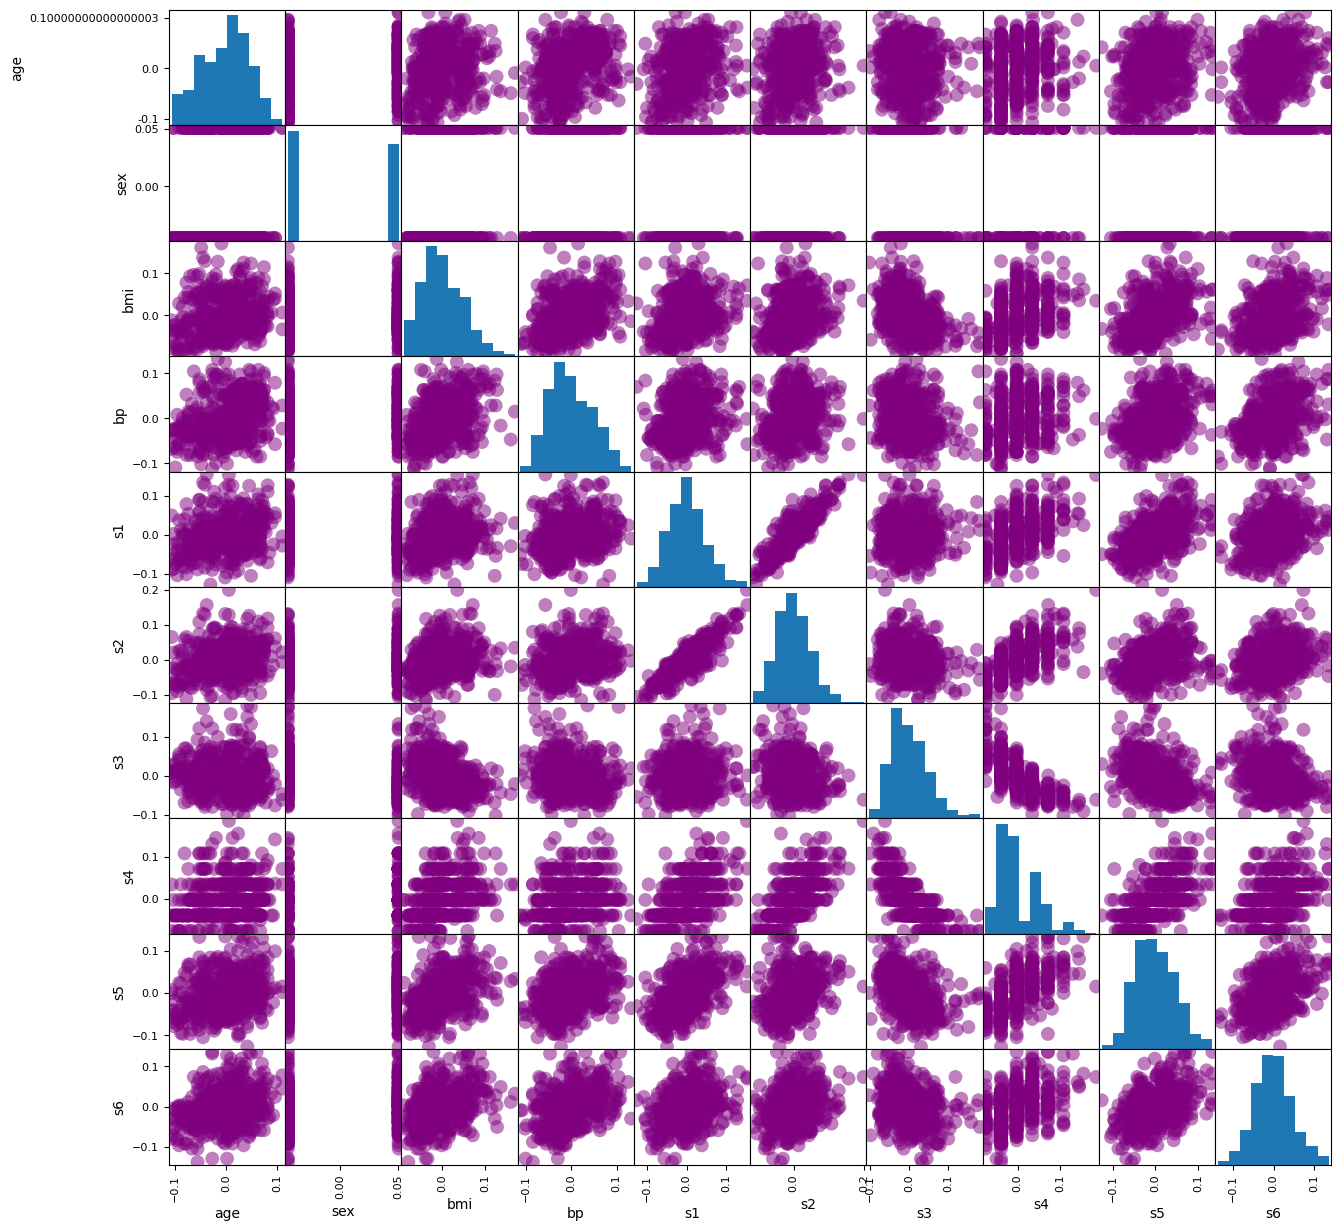

In [37]:
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
pd.plotting.scatter_matrix(df,s=400,c='purple')
plt.rcParams["figure.figsize"] = (15, 15)
plt.savefig('Scatter-Matrix')

## Linear Regression model

Coefficient: or m in y = mx+b: [934.35849612]
Mean squared error: 3636.39
Coefficient of determination: 0.41


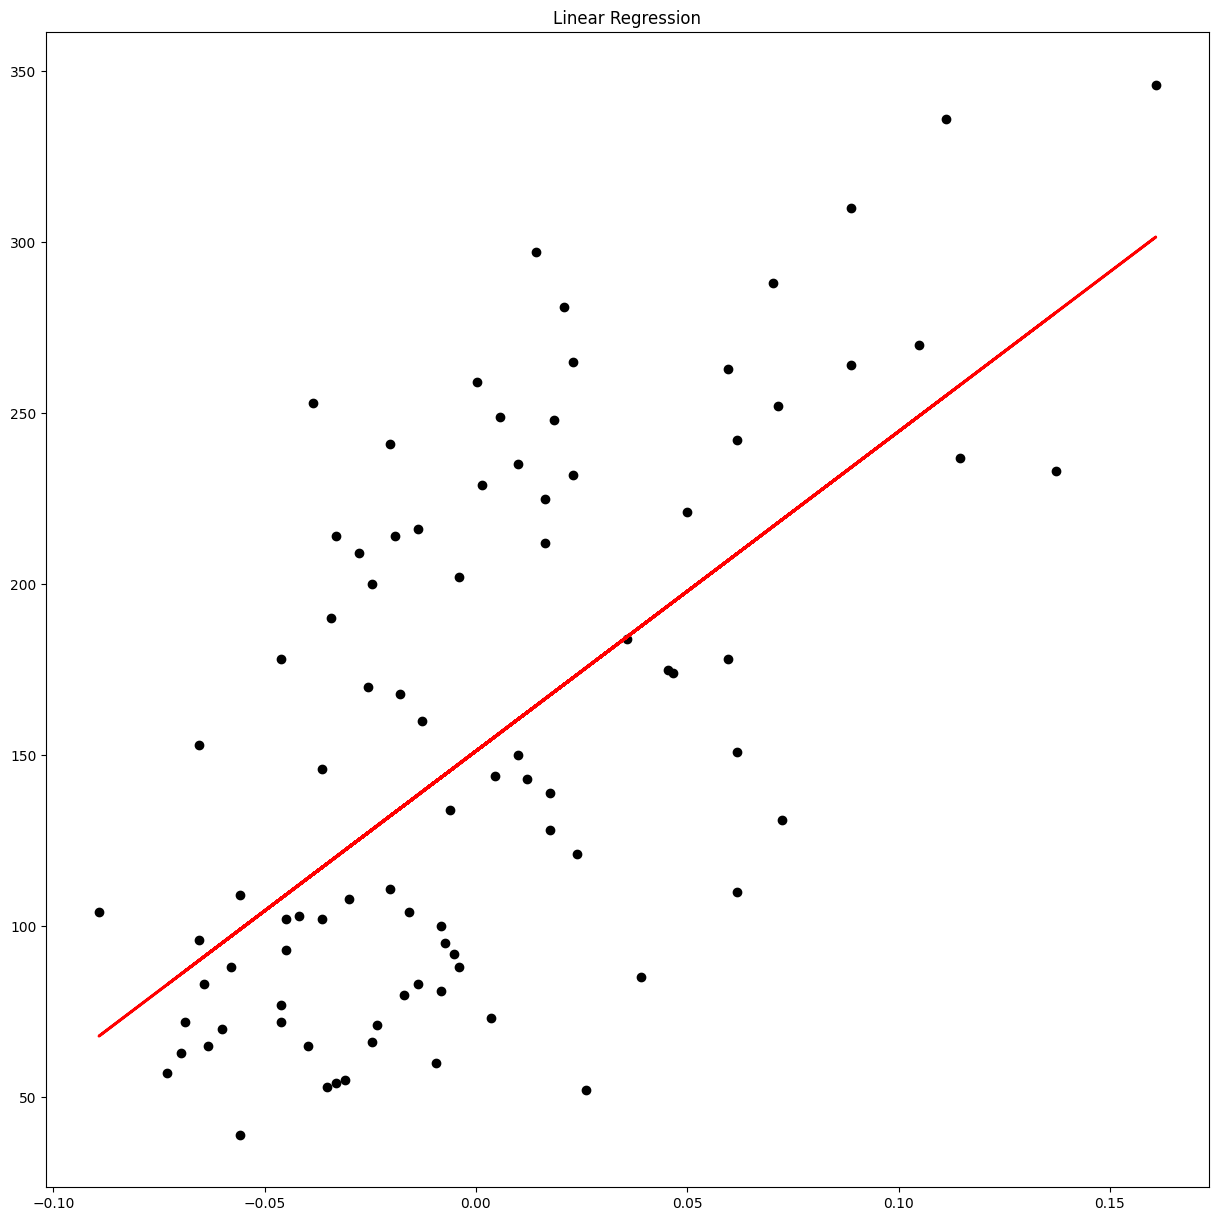

In [38]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_data, train_label)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(test_data)

# The coefficients
print(f"Coefficient: or m in y = mx+b: {regr.coef_}")
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_label, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_label, diabetes_y_pred))

# Plot outputs
plt.title('Linear Regression')
plt.scatter(test_data, test_label, color="black")
plt.plot(test_data, diabetes_y_pred, color="red", linewidth=2)
plt.savefig('Linear-Regression')

## Polynomial Regression model and Regularization

Coefficients for A + Ax + Ax^2 + Ax^n: 
: [[ 0.00000000e+00  7.41062529e+02 -2.24357742e+04  1.50448286e+05
   5.84374057e+06 -3.21391780e+07 -3.62274996e+08  2.09438287e+09]]

Mean squared error: 3636.39


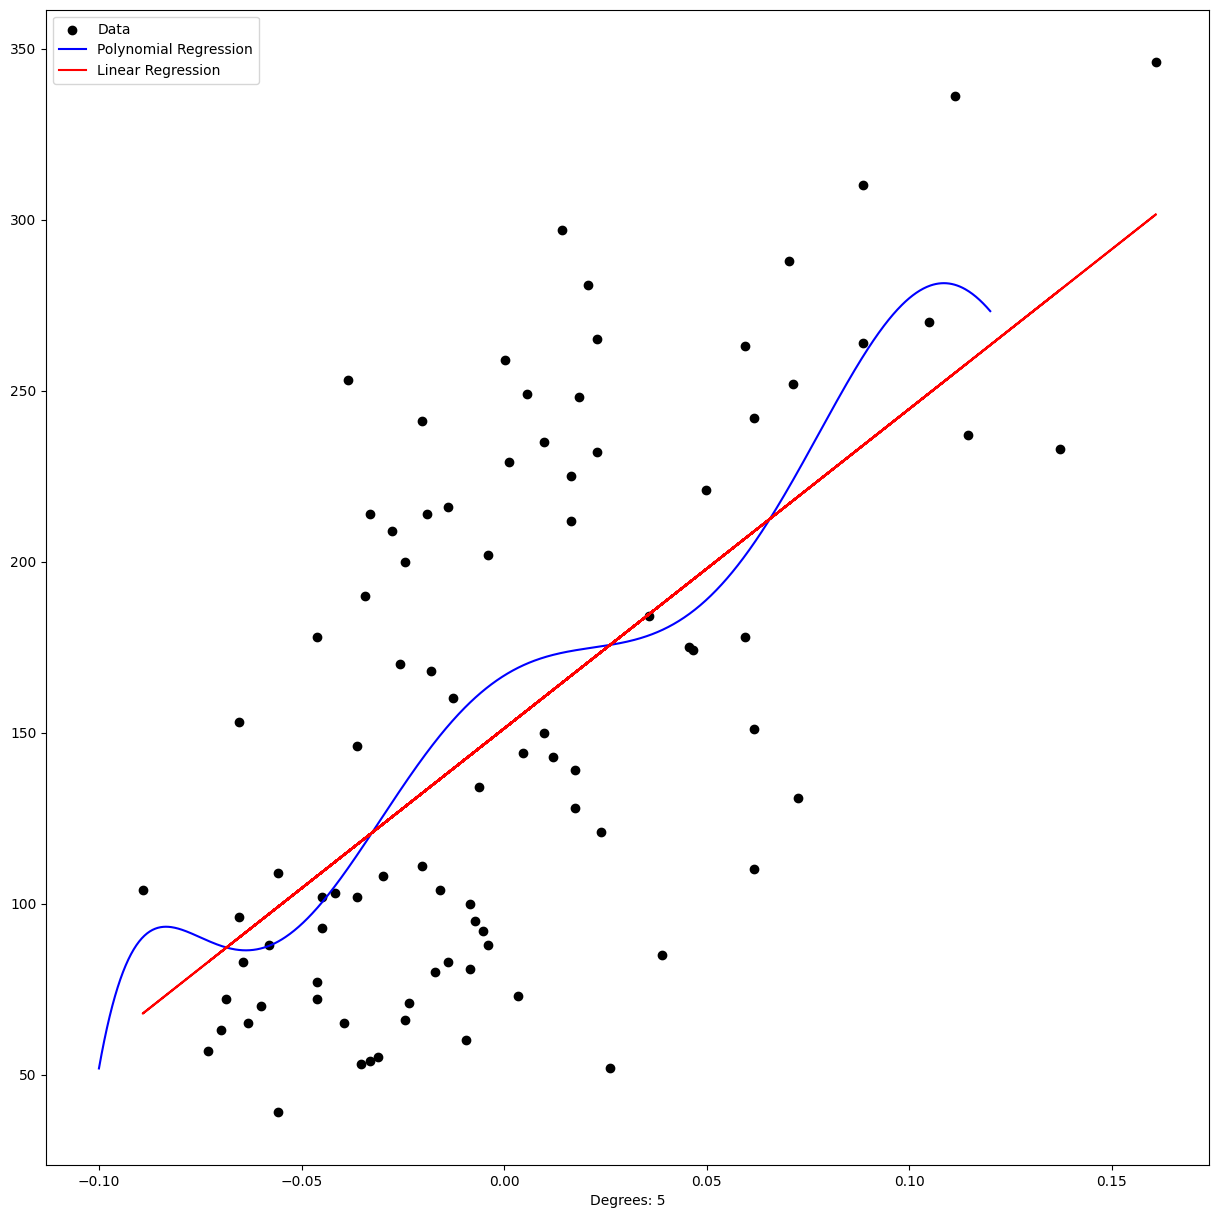

In [44]:
x = test_data
y = test_label
degree = 7

sample_space = np.linspace(-0.10,0.12,1000)[:,np.newaxis]

poly = PolynomialFeatures(degree=degree)

x_train_pf=poly.fit_transform(x)
x_test_pf=poly.fit_transform(y.reshape(-1, 1))

xx_pf=poly.fit_transform(sample_space)

# Use linear regression to fit our poly model
poly_model = linear_model.LinearRegression()
poly_model.fit(x_train_pf,y.reshape(-1, 1))

# The coefficients
print(f"Coefficients for A + Ax + Ax^2 + Ax^n: \n: {poly_model.coef_}\n")

print("Mean squared error: %.2f" % mean_squared_error(test_label, diabetes_y_pred))

plt.scatter(test_data, test_label, color="black", label="Data")
plt.plot(sample_space,poly_model.predict(xx_pf),'b-',label="Polynomial Regression")
plt.plot(test_data, diabetes_y_pred, color="red",label="Linear Regression")
plt.xlabel('Degrees: 5')
plt.legend(facecolor="white")
plt.savefig('Poly-Regression')

## Displaying different degrees to show their effects on the model

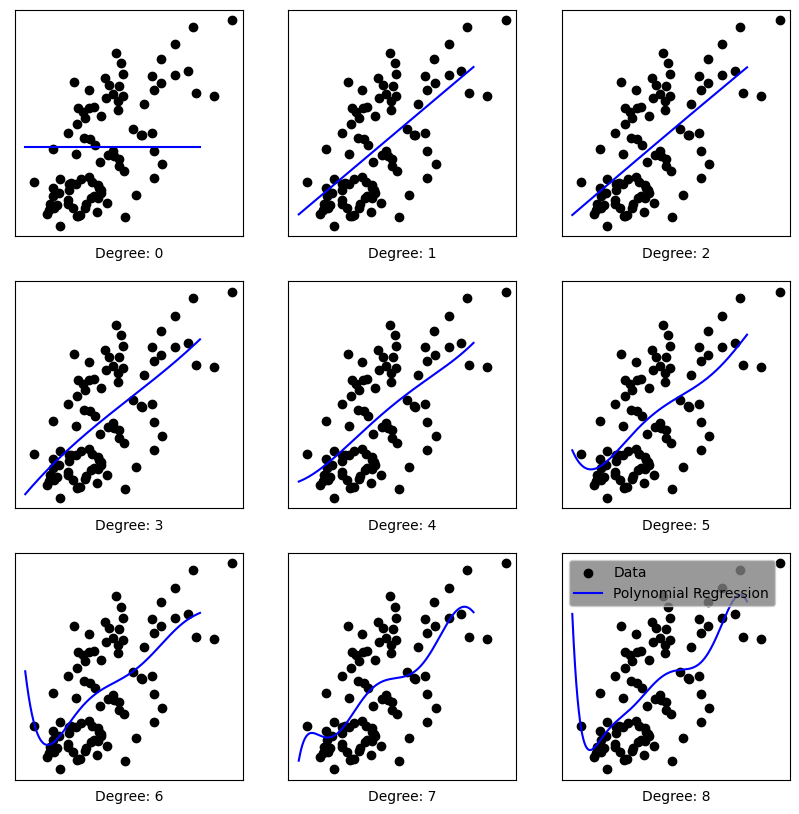

In [40]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) 

    poly = PolynomialFeatures(degree=i)

    x_train_pf=poly.fit_transform(x)
    x_test_pf=poly.fit_transform(y.reshape(-1, 1))

    xx_pf=poly.fit_transform(sample_space)

    # Use linear regression to fit our poly model
    poly_model = linear_model.LinearRegression()
    poly_model.fit(x_train_pf,y.reshape(-1, 1))

    plt.scatter(test_data, test_label, color="black", label="Data")
    plt.plot(sample_space,poly_model.predict(xx_pf),'b-',label="Polynomial Regression")
    plt.xlabel(f"Degree: {i}")
    plt.savefig('diff-deg')

plt.legend(facecolor="grey")

### Ridge Regularization

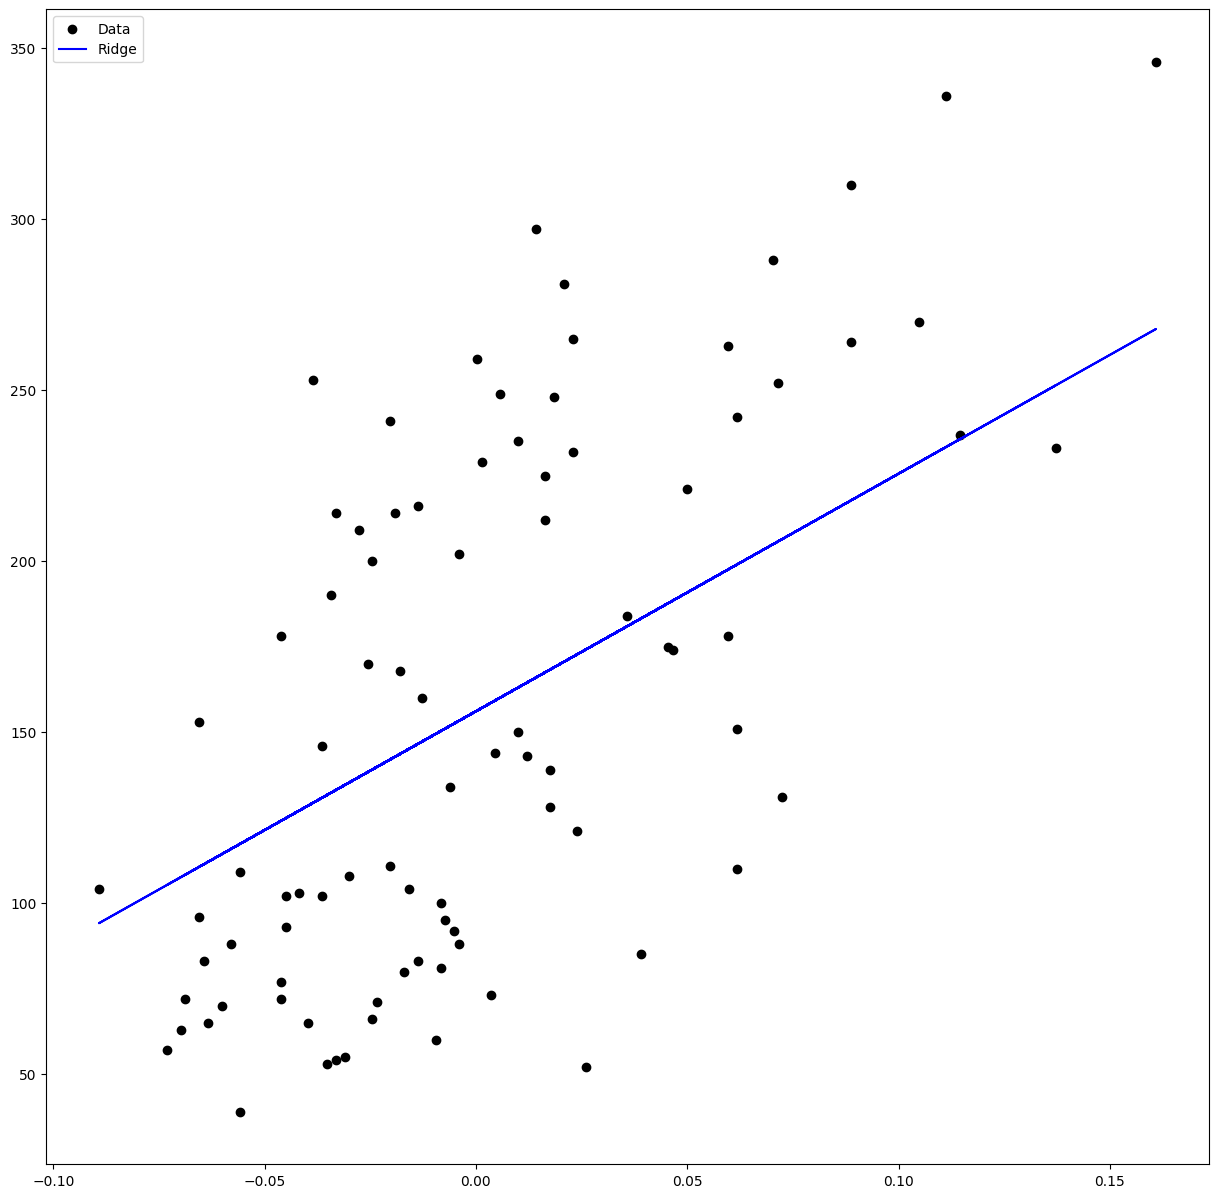

In [41]:
from sklearn.linear_model import Ridge

x = test_data
y = test_label

ridge_reg = Ridge(alpha=0.1,solver='cholesky',random_state=30)
ridge_reg.fit(x,y)
predict = ridge_reg.predict(x)

plt.scatter(x, y, color="black", label="Data")
plt.plot(x,predict,'b-',label="Ridge")
plt.legend(facecolor="white")
plt.savefig('Ridge-Reg')

### Lasso Regularization

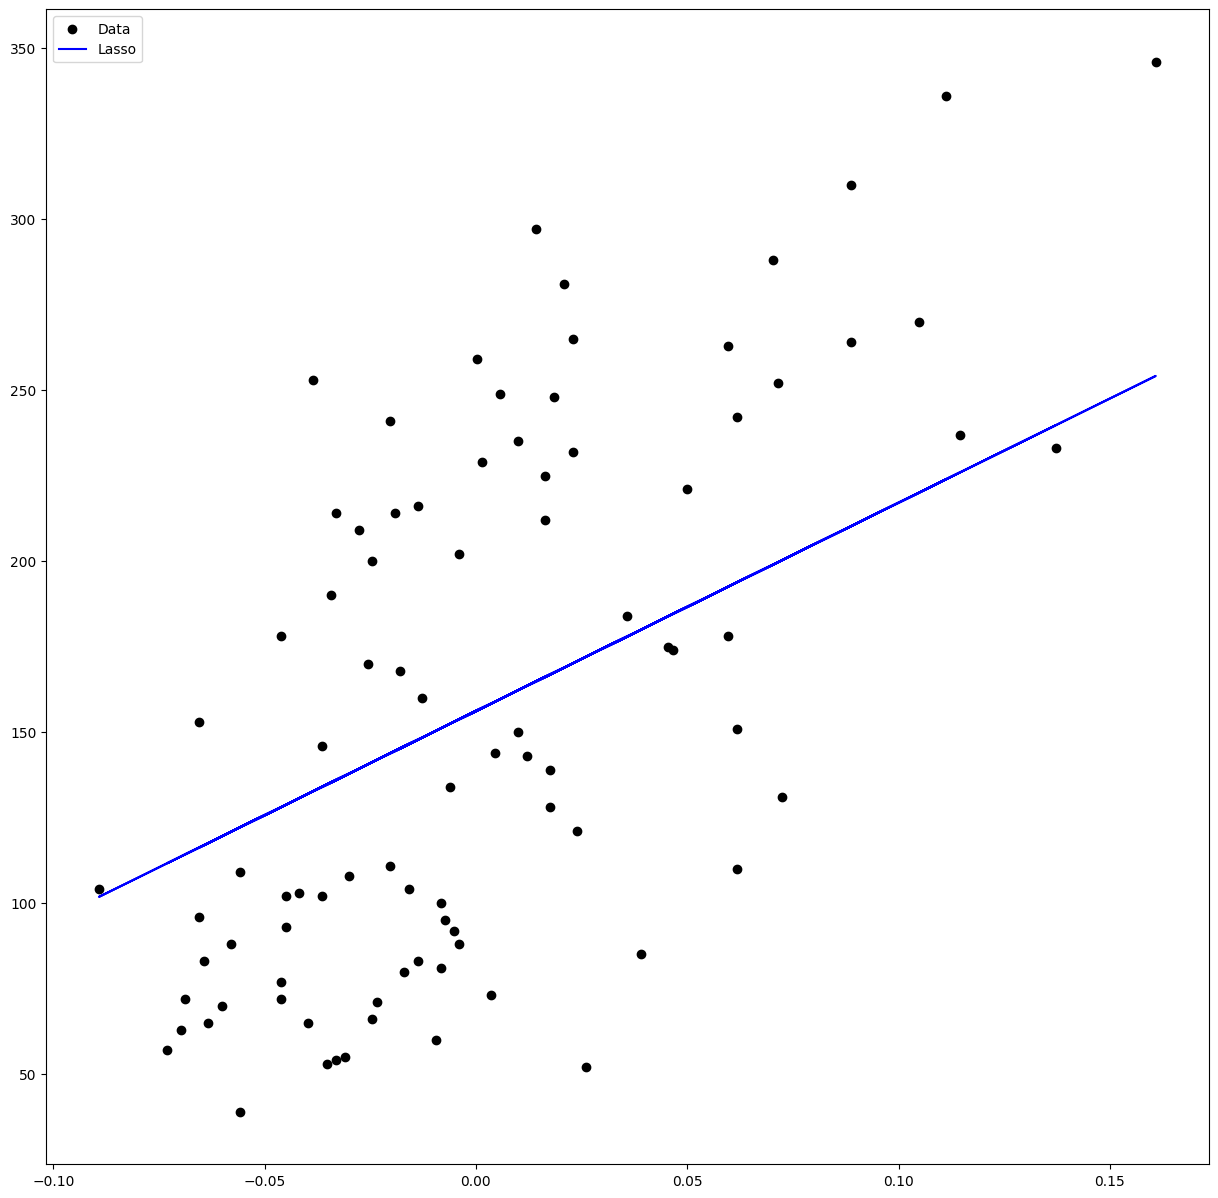

In [42]:
from sklearn.linear_model import Lasso

x = test_data
y = test_label

ridge_reg = Lasso(alpha=1, random_state=30)
ridge_reg.fit(x,y)
predict = ridge_reg.predict(x)

plt.scatter(x, y, color="black", label="Data")
plt.plot(x,predict,'b-',label="Lasso")
plt.legend(facecolor="white")
plt.savefig('Lasso-Reg')

### Elastic-Net Regularization

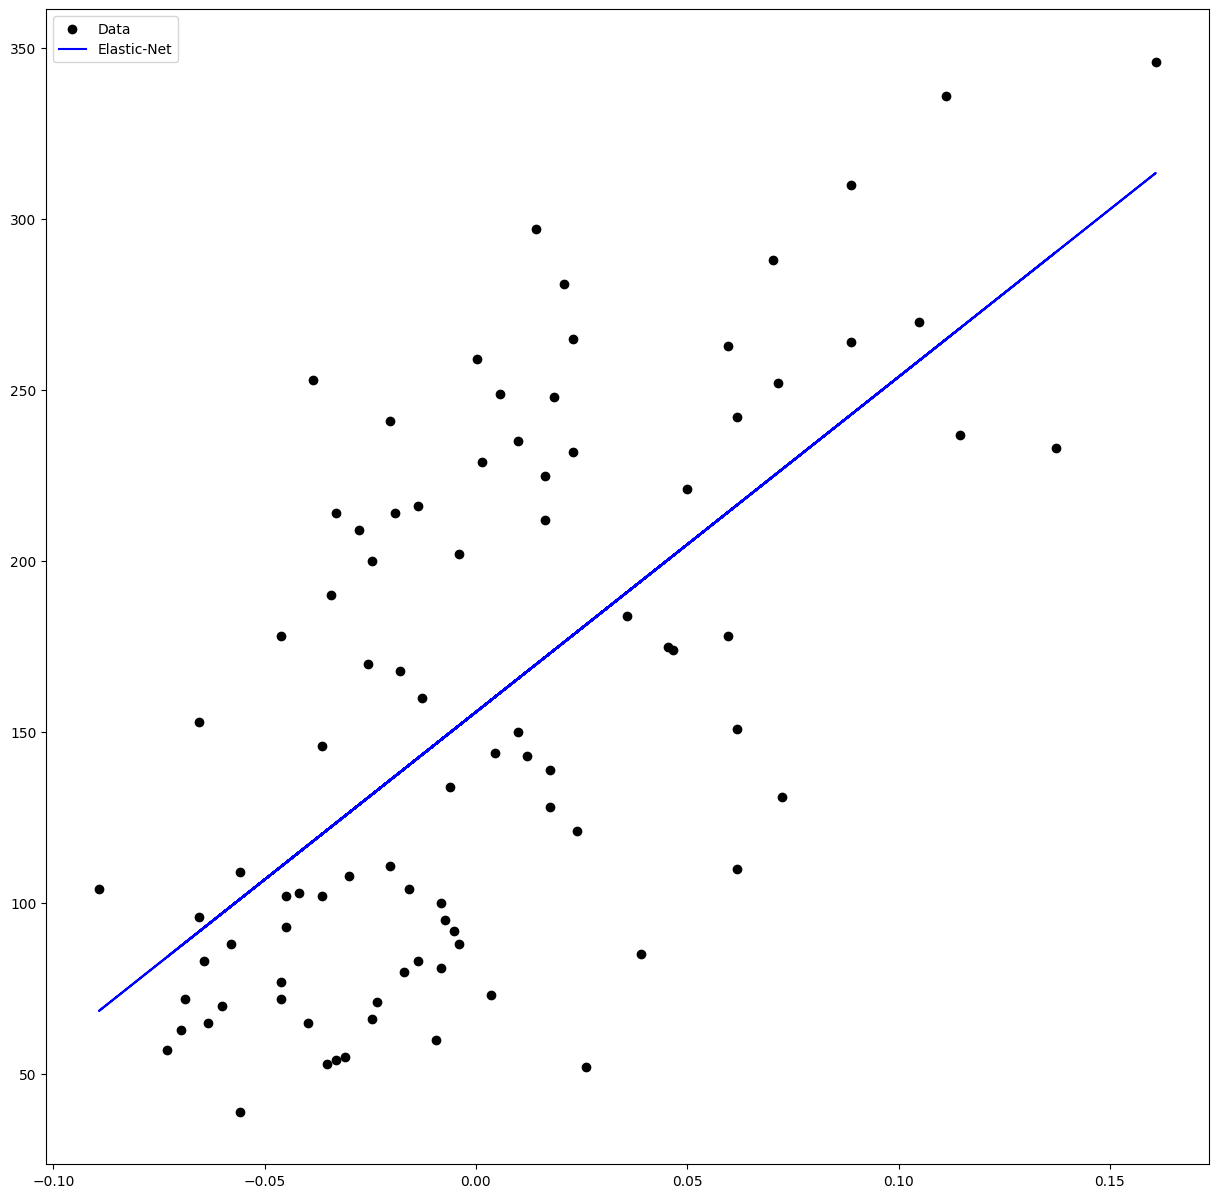

In [43]:
from sklearn.linear_model import ElasticNet

x = test_data
y = test_label

ridge_reg = ElasticNet(alpha=.0001, random_state=30)
ridge_reg.fit(x,y)
predict = ridge_reg.predict(x)

plt.scatter(x, y, color="black", label="Data")
plt.plot(x,predict,'b-',label="Elastic-Net")
plt.legend(facecolor="white")
plt.savefig('Elastic-Reg')